<a href="https://colab.research.google.com/github/Aditya-sharma112245/big-mart-sales-prediction/blob/main/BIG_MART_SALES_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
bm=pd.read_csv('/content/Train.csv')

In [ ]:
bm.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
bm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
bm.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
bm['Item_Weight'].fillna(bm['Item_Weight'].mean(),inplace=True)

<ipython-input-9-2ca273f25293>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bm['Item_Weight'].fillna(bm['Item_Weight'].mean(),inplace=True)


In [ ]:
bm['Outlet_Size'].fillna(bm['Outlet_Size'].mode()[0],inplace=True)

<ipython-input-10-53a224b380f1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bm['Outlet_Size'].fillna(bm['Outlet_Size'].mode()[0],inplace=True)


In [ ]:
bm.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [ ]:
bm.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
sns.set()

<ipython-input-14-a0af6e3fbe09>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bm['Item_Weight'])


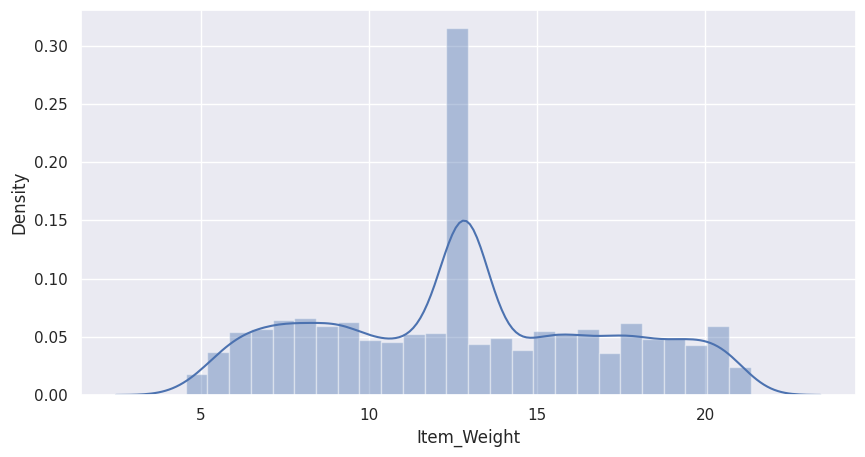

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(bm['Item_Weight'])
plt.show()

<ipython-input-15-0021624e1f5d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bm['Item_Visibility'])


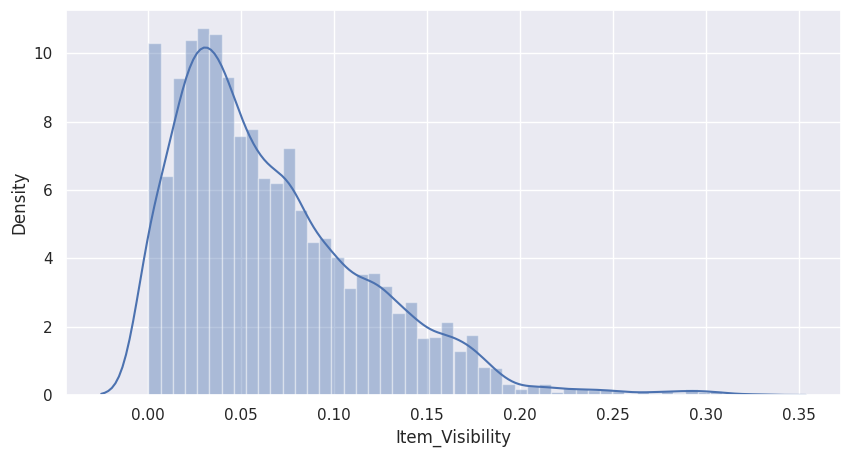

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(bm['Item_Visibility'])
plt.show()

<ipython-input-16-86dc6b0068e3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bm['Item_Outlet_Sales'])


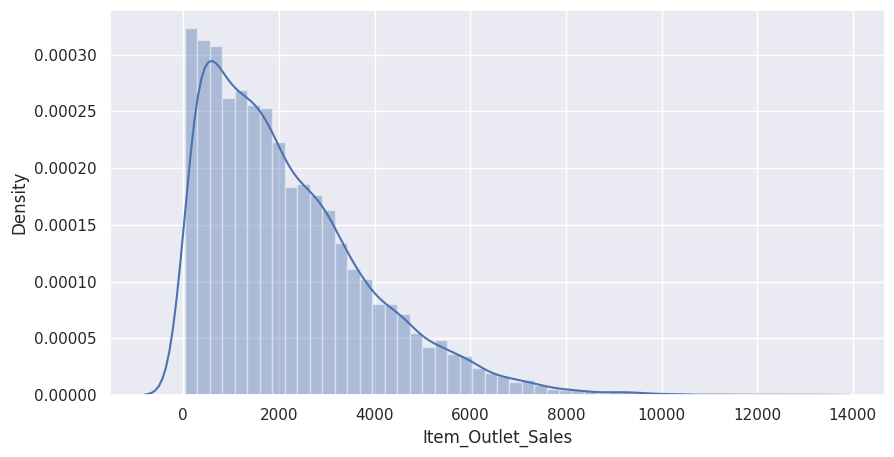

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(bm['Item_Outlet_Sales'])
plt.show()

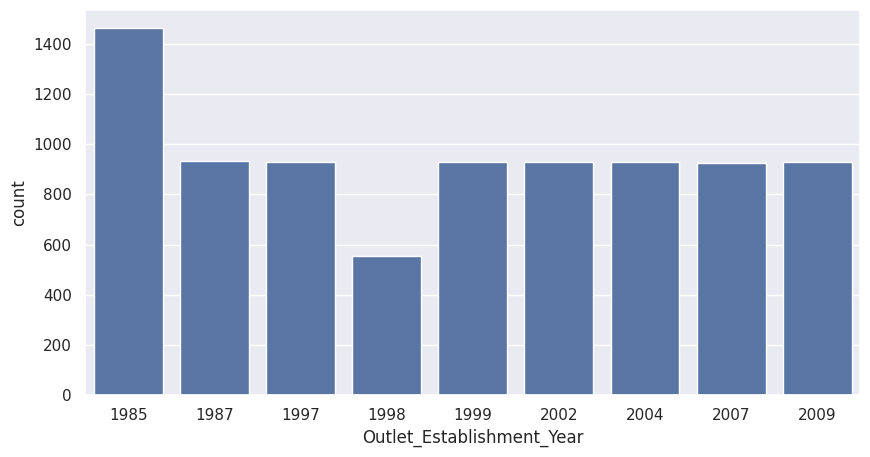

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Outlet_Establishment_Year',data=bm)
plt.show()

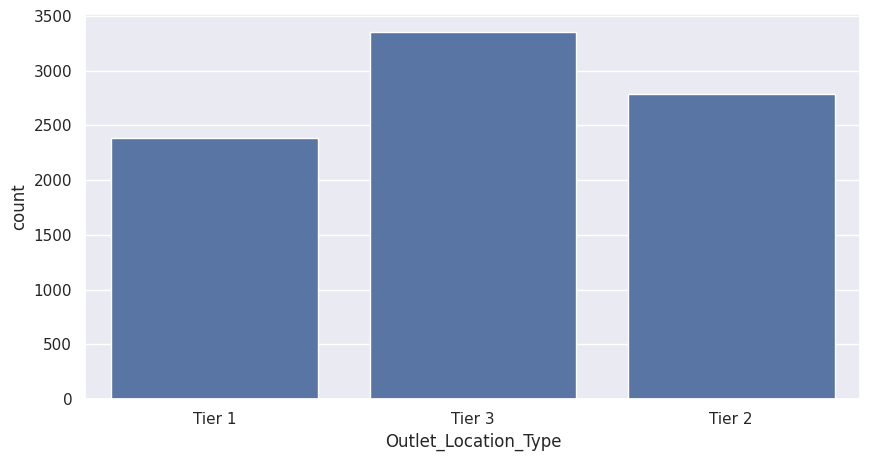

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Outlet_Location_Type',data=bm)
plt.show()

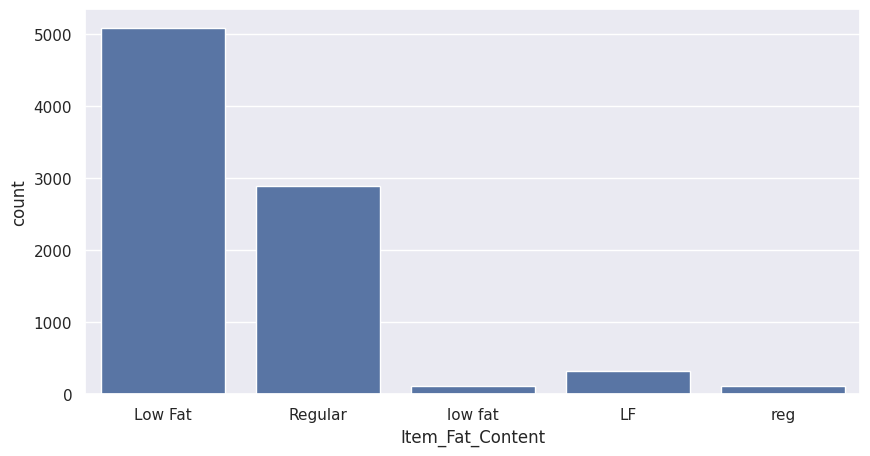

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Item_Fat_Content',data=bm)
plt.show()

In [ ]:
bm.replace({'Item_Fat_Content':{'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'}},inplace=True)

In [ ]:
encoder=LabelEncoder()

In [ ]:
bm['Item_Identifier']=encoder.fit_transform(bm['Item_Identifier'])
bm['Item_Fat_Content']=encoder.fit_transform(bm['Item_Fat_Content'])
bm['Item_Type']=encoder.fit_transform(bm['Item_Type'])
bm['Outlet_Identifier']=encoder.fit_transform(bm['Outlet_Identifier'])
bm['Outlet_Size']=encoder.fit_transform(bm['Outlet_Size'])
bm['Outlet_Location_Type']=encoder.fit_transform(bm['Outlet_Location_Type'])
bm['Outlet_Type']=encoder.fit_transform(bm['Outlet_Type'])

In [ ]:
X=bm.drop(columns='Item_Outlet_Sales',axis=1)
Y=bm['Item_Outlet_Sales']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

In [ ]:

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.5, 0.7, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.7, 0.8, 1.0],
    'reg_lambda': [0, 0.1, 1, 5],
    'reg_alpha': [0, 0.1, 0.5, 1]
}


random_search = RandomizedSearchCV(
    XGBRegressor(),
    param_distributions=param_dist,
    n_iter=50,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=2
)

random_search.fit(x_train, y_train)

print("Best parameters found: ", random_search.best_params_)



Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.8}


In [ ]:
best_params = {
    'subsample': 0.8,
    'reg_lambda': 1,
    'reg_alpha': 0.1,
    'n_estimators': 100,
    'max_depth': 3,
    'learning_rate': 0.05,
    'colsample_bytree': 0.8
}


final_regressor = XGBRegressor(**best_params)
final_regressor.fit(x_train, y_train)


y_train_pred = final_regressor.predict(x_train)
y_test_pred = final_regressor.predict(x_test)


train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Training R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")
print(f"Training MAE: {train_mae:.4f}, Test MAE: {test_mae:.4f}")
print(f"Training MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")



Training R²: 0.6055, Test R²: 0.6322
Training MAE: 754.6861, Test MAE: 742.0286
Training MSE: 1142082.3508, Test MSE: 1095316.3227
